In [1]:
from games.rps import RPS
from agents.fictitiousplay import FictitiousPlay
from agents.random_agent import RandomAgent
import matplotlib.pyplot as plt
import numpy as np
from agents.regretmatching import RegretMatching

In [2]:
g = RPS()
g.reset()

In [21]:
def play(agents_config, steps):
    g.reset()
    
    rewards = {
        g.agents[0]: [],
        g.agents[1]: []
    }

    moves = {
        g.agents[0]: [],
        g.agents[1]: []
    }

    policies = {
        g.agents[0]: [],
        g.agents[1]: []
    }

    for i in range(steps):
        actions = dict(map(lambda agent: (agent, agents_config[agent][1].action()), g.agents))
        g.step(actions)

        for agent_id in g.agents:
            r = g.reward(agent_id)
            rewards[agent_id].append(r)
            policies[agent_id].append(agents_config[agent_id][1].policy().copy())
            moves[agent_id].append(actions[agent_id])

        for _, ag in agents_config.values():
            ag.step_update()
    
    _, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

    # Cumulative average result
    agent1_avg = np.cumsum(rewards[g.agents[0]]) / np.arange(1, len(rewards[g.agents[0]]) + 1)
    agent2_avg = np.cumsum(rewards[g.agents[1]]) / np.arange(1, len(rewards[g.agents[1]]) + 1)
    axes[0,0].plot(agent1_avg, label=agents_config[g.agents[0]][0], color="C0")
    axes[0,0].plot(agent2_avg, label=agents_config[g.agents[1]][0], color="C1")
    axes[0,0].set_title('Cumulative average over time')
    axes[0,0].legend()
    axes[0,0].grid(True)

    # Agent 1 actions
    axes[0,1].set_xlabel('timesteps')
    axes[0,1].set_ylabel('actions')
    axes[0,1].plot(moves[g.agents[0]], color="C0")
    axes[0,1].set_yticks(np.arange(len(g._moves)), g._moves)
    axes[0,1].set_title(f'{agents_config[g.agents[0]][0]} actions over time')
    axes[0,1].grid(True)

    # Agent 2 actions
    axes[1,0].set_xlabel('timesteps')
    axes[1,0].set_ylabel('actions')
    axes[1,0].plot(moves[g.agents[1]], color="C1")
    axes[1,0].set_yticks(np.arange(len(g._moves)), g._moves)
    axes[1,0].set_title(f'{agents_config[g.agents[1]][0]} actions over time')
    axes[1,0].grid(True)

    #Agent 1 policy (or empirical action distributions)
    x = [p[0] for p in policies[g.agents[0]]]
    y = [p[1] for p in policies[g.agents[0]]]
    axes[1,1].plot(x[10:], y[10:], color="C0", linestyle="dashed")
    axes[1,1].set_title(f'{agents_config[g.agents[0]][0]} policy (or empirical action distributions)')
    axes[1,1].set_xlabel(('$\\pi_1(R)$'))
    axes[1,1].set_ylabel(('$\\pi_1(P)$'))
    axes[1,1].set_ylim(0, 1)
    axes[1,1].set_xlim(0, 1)
    axes[1,1].grid(True)

    # Agent 2 policy (or empirical action distributions)
    x = [p[0] for p in policies[g.agents[1]]]
    y = [p[1] for p in policies[g.agents[1]]]
    axes[2,0].plot(x[10:], y[10:], color="C1", linestyle="dashed")
    axes[2,0].set_title(f'{agents_config[g.agents[1]][0]} policy (or empirical action distributions)')
    axes[2,0].set_xlabel(('$\\pi_2(R)$'))
    axes[2,0].set_ylabel(('$\\pi_2(P)$'))
    axes[2,0].set_ylim(0, 1)
    axes[2,0].set_xlim(0, 1)
    axes[2,0].grid(True)

    plt.tight_layout()
    plt.show()

### FP vs FP

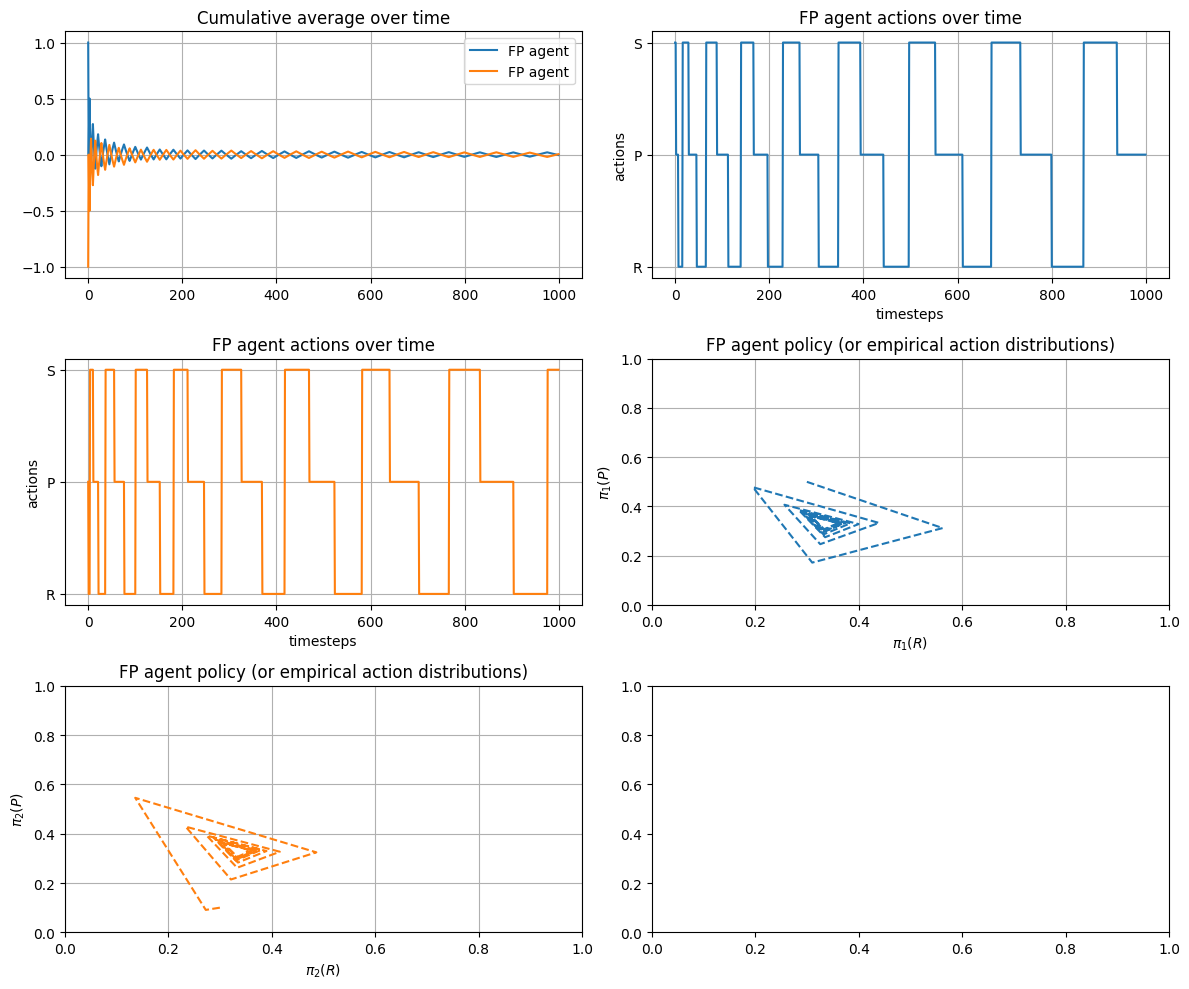

[0.31331331 0.34934935 0.33733734]
[0.35035035 0.32632633 0.32332332]


In [22]:
fp_vs_fp = {
    g.agents[0]: ('FP agent', FictitiousPlay(game=g, agent=g.agents[0])),
    g.agents[1]: ('FP agent', FictitiousPlay(game=g, agent=g.agents[1])),
}

play(fp_vs_fp, 1000)
print(fp_vs_fp[g.agents[0]][1].policy())
print(fp_vs_fp[g.agents[1]][1].policy())

### FP vs RM

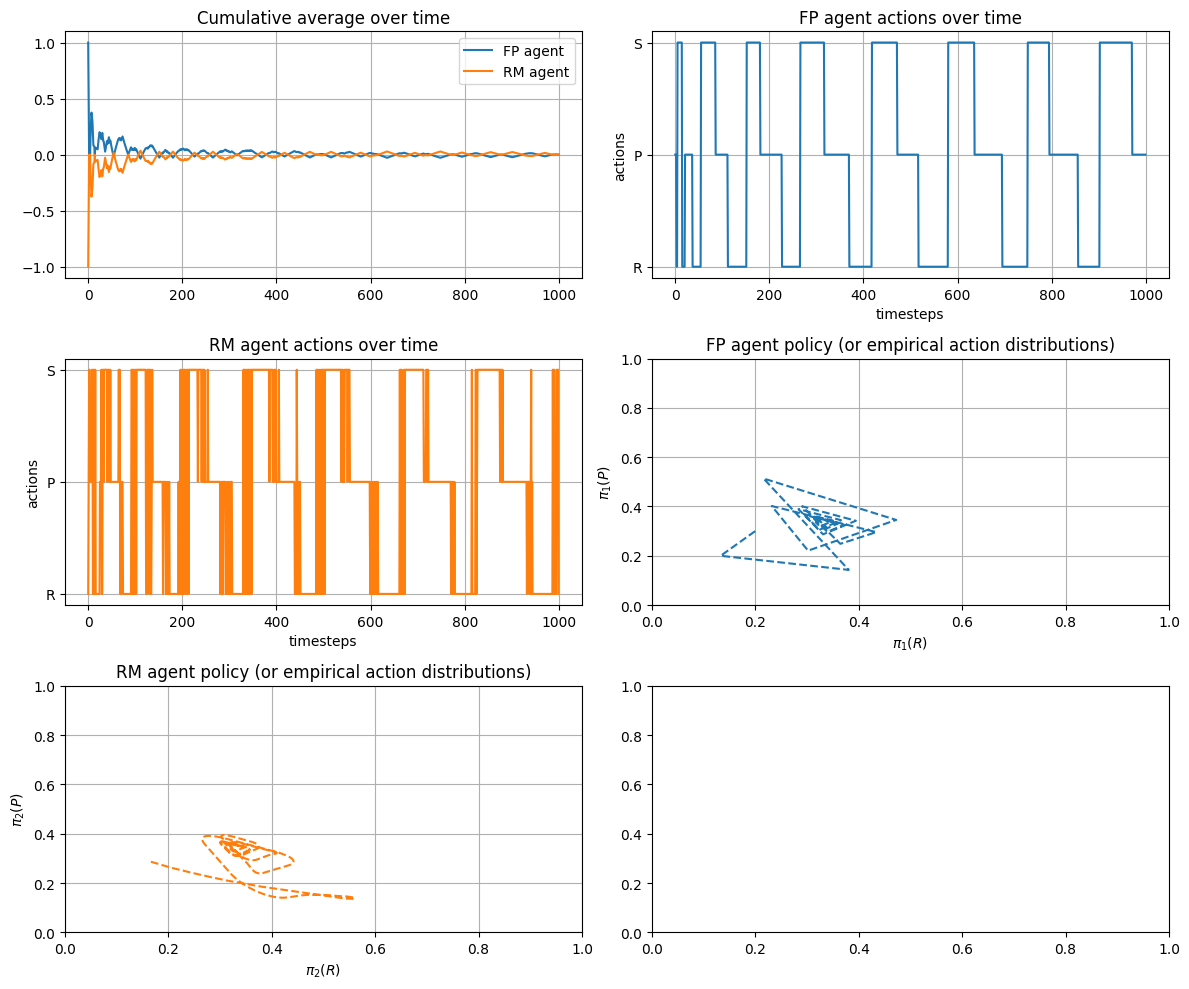

[0.31631632 0.33733734 0.34634635]
[0.34052523 0.34415076 0.31532401]


In [23]:
fp_vs_rm = {
    g.agents[0]: ('FP agent', FictitiousPlay(game=g, agent=g.agents[0])),
    g.agents[1]: ('RM agent', RegretMatching(game=g, agent=g.agents[1])),
}

play(fp_vs_rm, 1000)

print(fp_vs_rm[g.agents[0]][1].policy())
print(fp_vs_rm[g.agents[1]][1].policy())

### FP vs Random

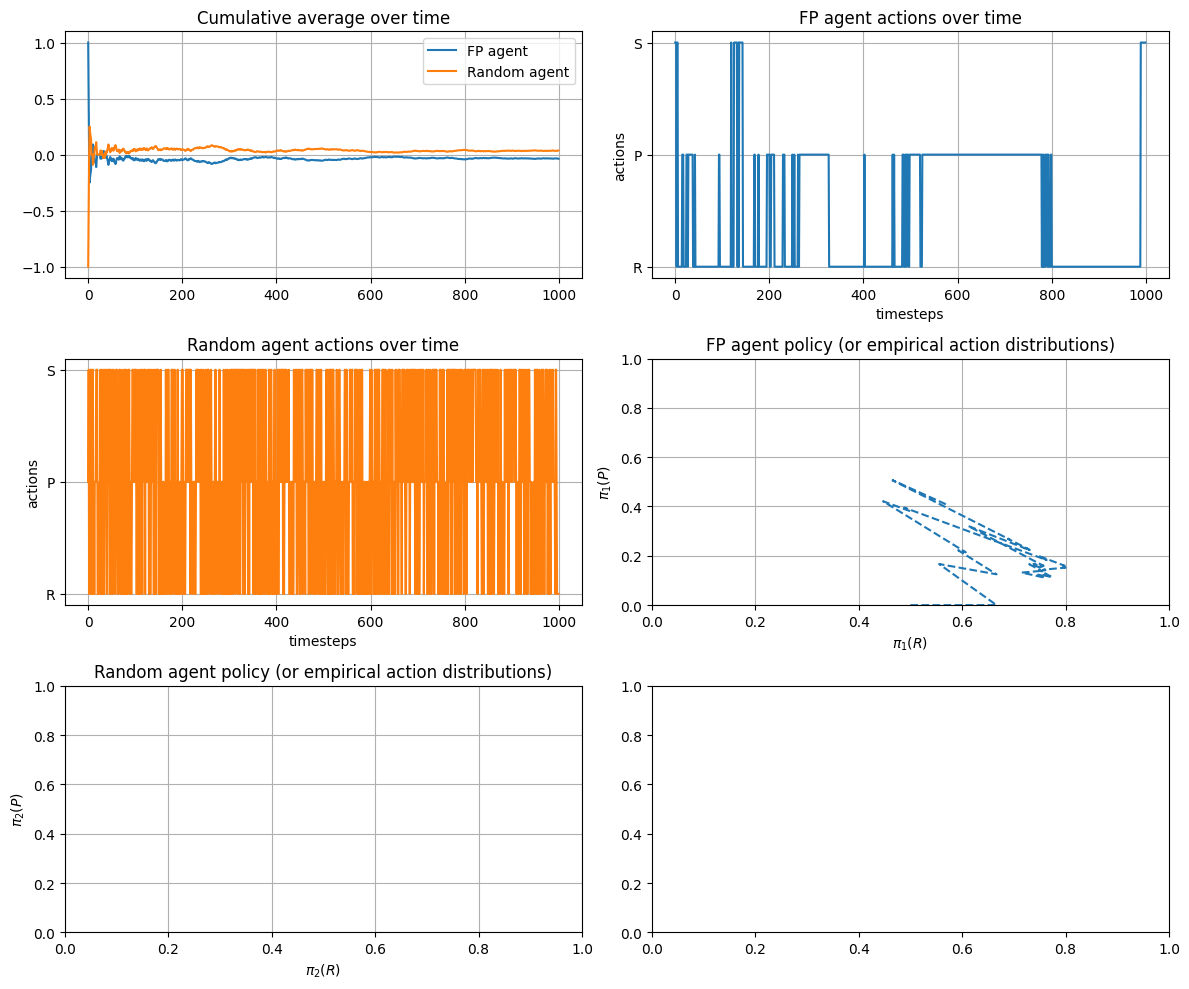

[0.56356356 0.4044044  0.03203203]
[0.33333333 0.33333333 0.33333333]


In [24]:
fp_vs_random = {
    g.agents[0]: ('FP agent', FictitiousPlay(game=g, agent=g.agents[0])),
    g.agents[1]: ('Random agent', RandomAgent(game=g, agent=g.agents[1])),
}

play(fp_vs_random, 1000)

print(fp_vs_random[g.agents[0]][1].policy())
print(fp_vs_random[g.agents[1]][1].policy())

### RM vs RM

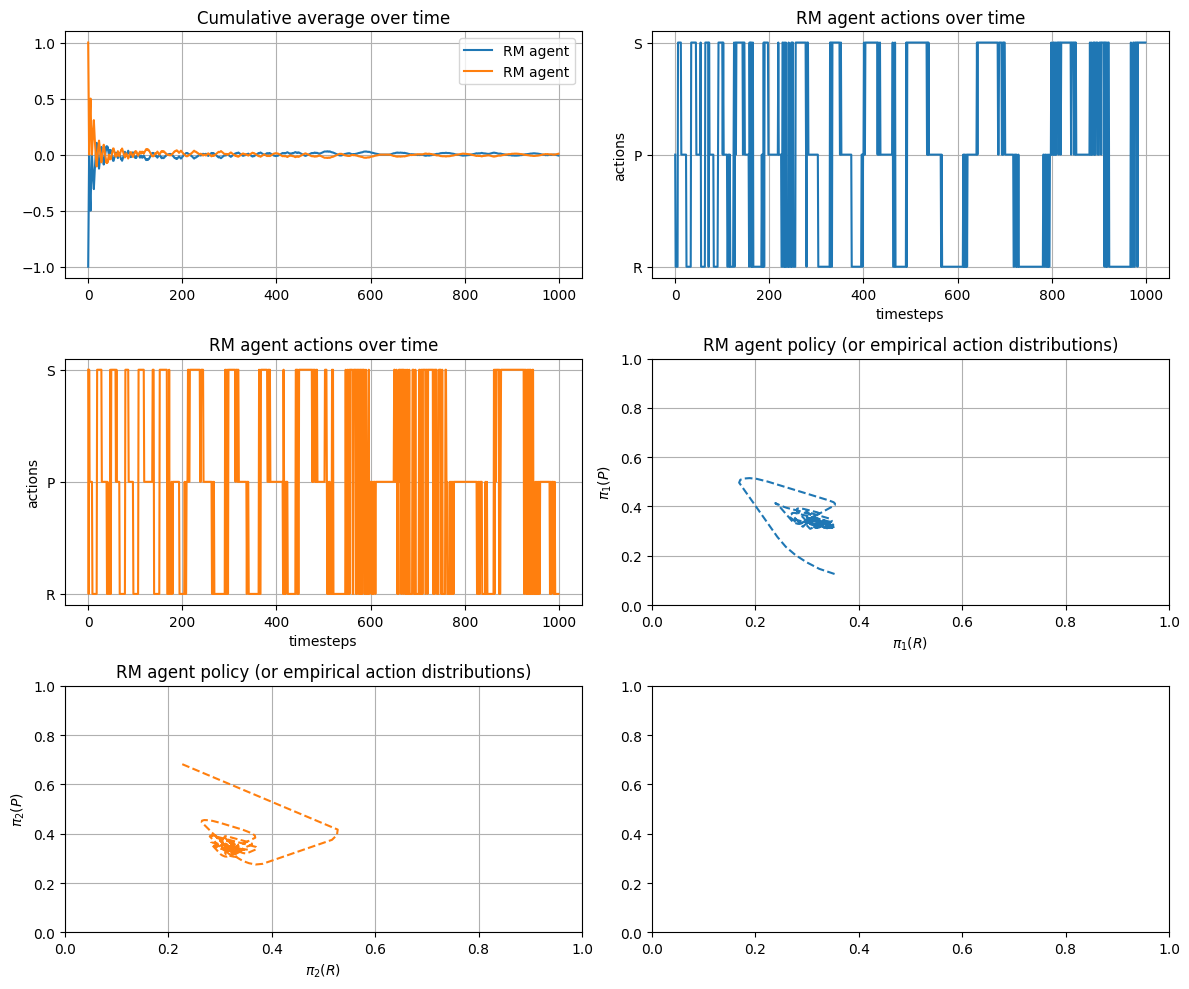

[0.3416763  0.31414064 0.34418305]
[0.3215951  0.34077    0.33763491]


In [25]:
rm_vs_rm = {
    g.agents[0]: ('RM agent', RegretMatching(game=g, agent=g.agents[0])),
    g.agents[1]: ('RM agent', RegretMatching(game=g, agent=g.agents[1])),
}

play(rm_vs_rm, 1000)

print(rm_vs_rm[g.agents[0]][1].policy())
print(rm_vs_rm[g.agents[1]][1].policy())

### RM vs Random

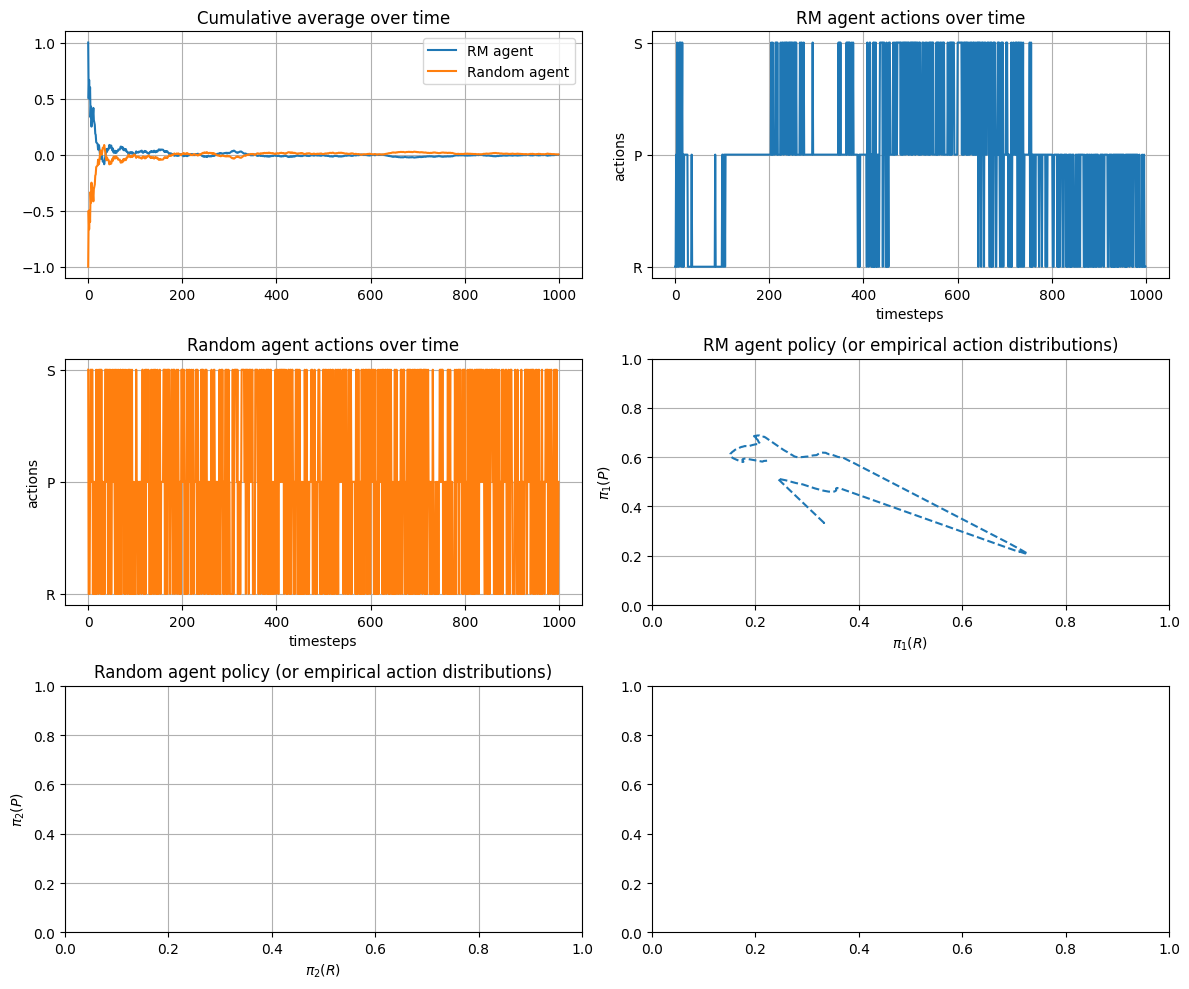

[0.2256868  0.58678758 0.18752562]
[0.33333333 0.33333333 0.33333333]


In [26]:
rm_vs_random = {
    g.agents[0]: ('RM agent', RegretMatching(game=g, agent=g.agents[0])),
    g.agents[1]: ('Random agent', RandomAgent(game=g, agent=g.agents[1])),
}

play(rm_vs_random, 1000)

print(rm_vs_random[g.agents[0]][1].policy())
print(rm_vs_random[g.agents[1]][1].policy())